### Klasyfikacja całych słów
Kolejnym zagadnieniem jakie poruszym jest rozpoznawanie całych słów zapisanych pismem odręcznym. 

Rozpoczynam od załadowania niezbędnych bibliotek. Tak samo jako poprzednio będziemy używać biblioteki "PyTorch" do trenowania sieci neuronowej, która posłuży do rozpoznawania pismam odręcznego pochodzących ze zbioru odręcznie zapisanych formularzy Iam.

Do przygotowania zbioru danych użyjemy biblioteki pochodzącej ze zbioru AWS o nazwie OCR. Dzięki tej bibliotece możemy wczytać zbiór i przygotować go do przetwarzania. Ważne jest w pliku credentials.json określić dane dostępowe do api serwisu iam.

In [13]:
### Import  bibliotek

import random
import matplotlib.pyplot as plt
from ocr.utils.iam_dataset import IAMDataset, resize_image, crop_image, crop_handwriting_page
from ocr.paragraph_segmentation_dcnn import SegmentationNetwork, paragraph_segmentation_transform

In [ ]:
ctx = mx.gpu(0)

#### Przygotowanie zbioru danych.
Zbiór pobieramy z serwera iam. Następnie losowo wybieramy 4 formularze do analizy.

In [2]:
test_ds = IAMDataset("form_original", train=False)

Completed: [--------------------------------------- ]  99%Completed: [--                                      ]   7%Completed: [----                                    ]  10%Completed: [------                                  ]  17%Completed: [-------                                 ]  17%Completed: [-------                                 ]  18%Completed: [-------                                 ]  19%Completed: [--------                                ]  21%Completed: [--------                                ]  21%Completed: [---------                               ]  24%Completed: [-----------                             ]  28%Completed: [-------------                           ]  32%Completed: [-------------                           ]  33%Completed: [--------------                          ]  35%Completed: [----------------                        ]  42%Completed: [------------------                      ]  45%Completed: [-------------------                     ]  48%Completed: [--

In [5]:
random.seed(1)

In [6]:
figs_to_plot = 4
images = []

n = 0
for i in range(0, figs_to_plot):
    n = int(random.random()*len(test_ds))
    image, _ = test_ds[n]
    images.append(image)

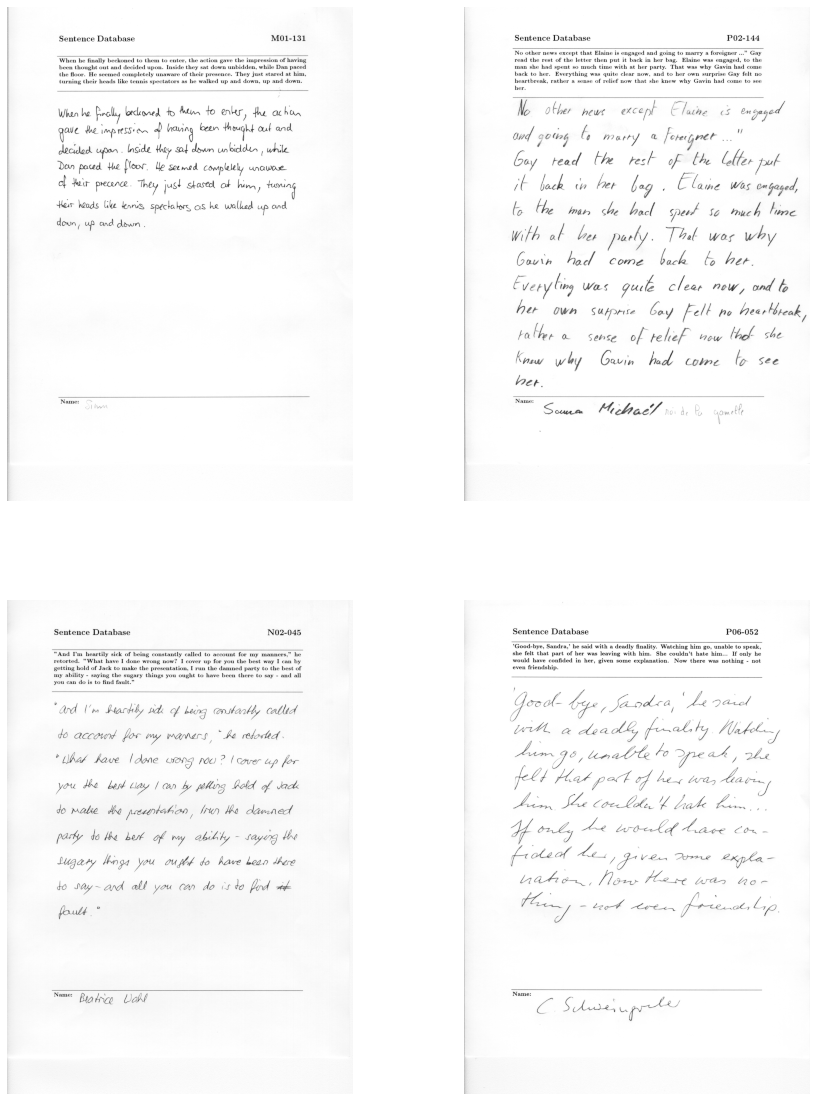

In [9]:
fig, axs = plt.subplots(int(len(images)/2), 2, figsize=(15, 10 * len(images)/2))
for i, image in enumerate(images):
    y, x = int(i/2), int(i%2)
    axs[y, x].imshow(image, cmap='Greys_r')
    axs[y, x].axis('off')

#### Segmentacja akaptiów

Mając obraz formularza w zbiorze danych IAM, należy przewidzieć obaszar w którym występuje tekst pisany odręcznie. Model został przeszkolony przy użyciu https://github.com/ThomasDelteil/Gluon_OCR_LSTM_CTC/blob/master/paragraph_segmentation_dcnn.py, a przykład jest przedstawiony w https://github.com/ThomasDelteil/Gluon_OCR_LSTM_CTC/blob/master/paragraph_ipnnn.segment.

In [14]:
paragraph_segmentation_net = SegmentationNetwork(ctx=ctx)
paragraph_segmentation_net.cnn.load_parameters("models/paragraph_segmentation2.params", ctx=ctx)

NameError: name 'ctx' is not defined